<a href="https://colab.research.google.com/github/tejalvs/RobotOdometryMining/blob/main/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import plotly.express as px
from sklearn.model_selection import train_test_split 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
roomba_data=pd.read_csv('/content/drive/MyDrive/RoombaData_XY_cleaned.csv')
mobile_robot_data=pd.read_csv('/content/drive/MyDrive/MobileRobot_XY_cleaned.csv')
roomba_data=roomba_data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
mobile_robot_data=mobile_robot_data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)


In [4]:
mobile_robot_data.columns

Index(['X_ODOM', 'Y_ODOM', 'Theta', 'Velocity', 'Odometry_Distance', 'X_GR',
       'Y_GR', 'Ground_Truth_Distance', 'Surface_Type', 'Time_To_Travel',
       'Cumulative_Time', 'Cumulative_Theta', 'Series_ID',
       'Distance_travelled_error', 'X_error', 'Y_error', 'timestamp'],
      dtype='object')

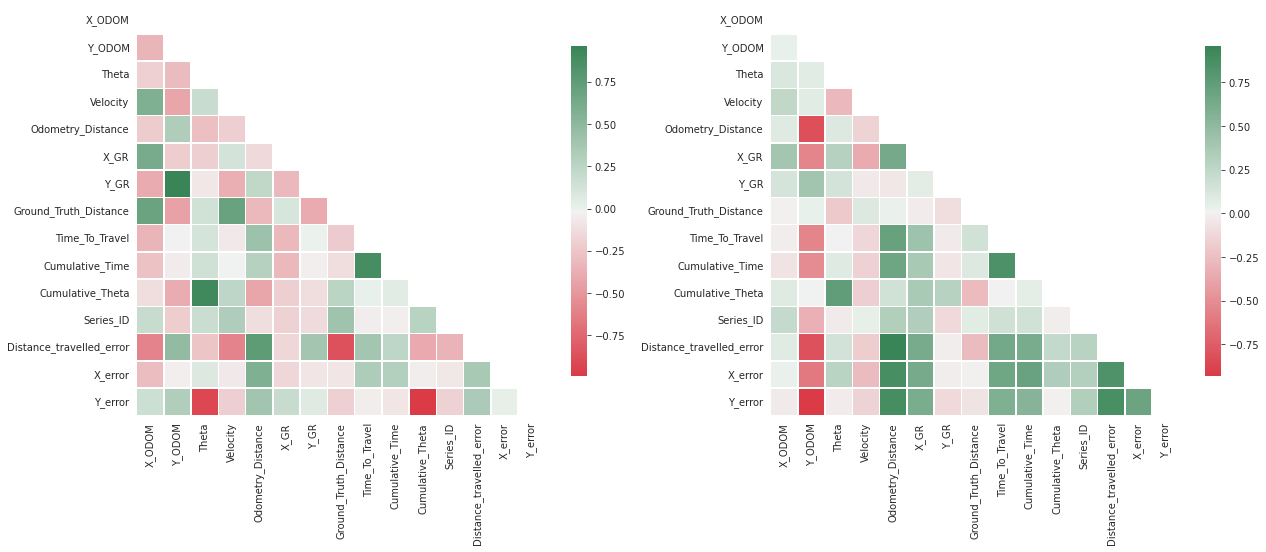

In [5]:
corr1 = roomba_data.corr()
corr2 = mobile_robot_data.corr()
# visualise the data with seaborn
mask = np.triu(np.ones_like(corr1, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(1,2,figsize=(18, 10))
cmap = sns.diverging_palette(10, 500, as_cmap=True)
sns.heatmap(corr1, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[0])
mask = np.triu(np.ones_like(corr2, dtype=np.bool))
sns.heatmap(corr2, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[1])
f.tight_layout()

In [6]:
label=[]
for i in roomba_data['Distance_travelled_error']:
  if i>0.01:
    label.append(1)
  else:
    label.append(0)
roomba_data['Label']=label
label=[]
for i in mobile_robot_data['Distance_travelled_error']:
  if i>0.01:
    label.append(1)
  else:
    label.append(0)
mobile_robot_data['Label']=label
roomba_data

,X_ODOM,Y_ODOM,Theta,Velocity,Odometry_Distance,X_GR,Y_GR,Ground_Truth_Distance,Surface_Type,Time_To_Travel,Cumulative_Time,Cumulative_Theta,Series_ID,Distance_travelled_error,X_error,Y_error,timestamp,Label
0,-0.330820,0.001408,5.687978e-03,-0.1,0.000000,-0.329817,0.001415,0.001278,CARPET,0.299245,0.299245,-1.192579e+00,1.0,0.001278,0.001003,0.000007,2021-10-27 15:46:07.640,0
1,-0.330820,0.001408,5.687978e-03,-0.1,0.000000,-0.330319,0.001411,0.000000,CARPET,0.315252,0.614497,-1.186891e+00,1.0,0.000000,0.000502,0.000004,2021-10-27 15:46:07.672,0
2,-0.331043,0.001406,3.791985e-03,-0.1,0.000223,-0.330152,0.001413,0.001278,CARPET,0.331526,0.946024,-1.183099e+00,1.0,0.001055,0.000891,0.000007,2021-10-27 15:46:07.719,0
3,-0.332380,0.001401,3.791985e-03,-0.1,0.001559,-0.329316,0.001419,0.005112,CARPET,0.348310,1.294334,-1.179307e+00,1.0,0.003552,0.003064,0.000018,2021-10-27 15:46:07.750,0
4,-0.334830,0.001396,5.687978e-03,-0.1,0.004010,-0.328012,0.001428,0.010223,CARPET,0.364525,1.658858,-1.173619e+00,1.0,0.006213,0.006818,0.000032,2021-10-27 15:46:07.782,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,-1.738000,-0.002000,0.000000e+00,0.5,0.001000,-1.440174,-0.000691,-0.000138,CARPET,2.110419,102.113155,-5.633375e-15,20.0,0.001138,0.297826,0.001309,2021-10-28 15:21:21.742,0
3811,-1.738000,-0.002000,0.000000e+00,0.5,0.001000,-1.443409,-0.000695,0.001650,CARPET,2.110359,104.223514,-5.633375e-15,20.0,0.000650,0.294591,0.001305,2021-10-28 15:21:21.841,0
3812,-1.738000,-0.002000,-2.449294e-16,0.5,0.001000,-1.448131,-0.000700,0.001467,CARPET,2.111824,106.335338,-5.878305e-15,20.0,0.000467,0.289869,0.001300,2021-10-28 15:21:21.941,0
3813,-1.738000,-0.002000,0.000000e+00,0.5,0.001000,-1.452708,-0.000704,0.000183,CARPET,2.114523,108.449860,-5.878305e-15,20.0,0.000817,0.285292,0.001296,2021-10-28 15:21:22.038,0


In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from statsmodels.regression.linear_model import OLS
import sklearn.preprocessing as Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import itertools as it
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
from itertools import combinations
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [8]:
roomba_df=roomba_data[['Velocity','Cumulative_Time','Cumulative_Theta','Time_To_Travel','X_error', 'Y_error','Label']]
mobile_robot_df=mobile_robot_data[['Velocity','Cumulative_Time','Cumulative_Theta','Time_To_Travel','X_error', 'Y_error','Label']]

In [9]:
X = mobile_robot_df.iloc[:, :-1]
Y = mobile_robot_df.iloc[:, -1]


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

print("Shape of train data of X = % s and Y = % s "%(x_train.shape, y_train.shape)) 
print("Shape of test data of X = % s and Y = % s"%(x_test.shape, y_test.shape)) 


Shape of train data of X = (9988, 6) and Y = (9988,) 
Shape of test data of X = (3330, 6) and Y = (3330,)


In [11]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(x_train, y_train)
y_pred = lreg.predict(x_test)

In [12]:
#Calculating the Mean-Squared Error(MSE):
mse = np.mean((y_pred - y_test)**2)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.15796567297609976


In [13]:
lreg_coef = pd.DataFrame()
lreg_coef['Columns']= x_train.columns
lreg_coef['Coefficient Estimate']= pd.Series(lreg.coef_)
print(lreg_coef)

            Columns  Coefficient Estimate
0          Velocity              0.056079
1   Cumulative_Time             -0.000191
2  Cumulative_Theta             -0.000326
3    Time_To_Travel              0.056225
4           X_error              0.032917
5           Y_error             -0.011027


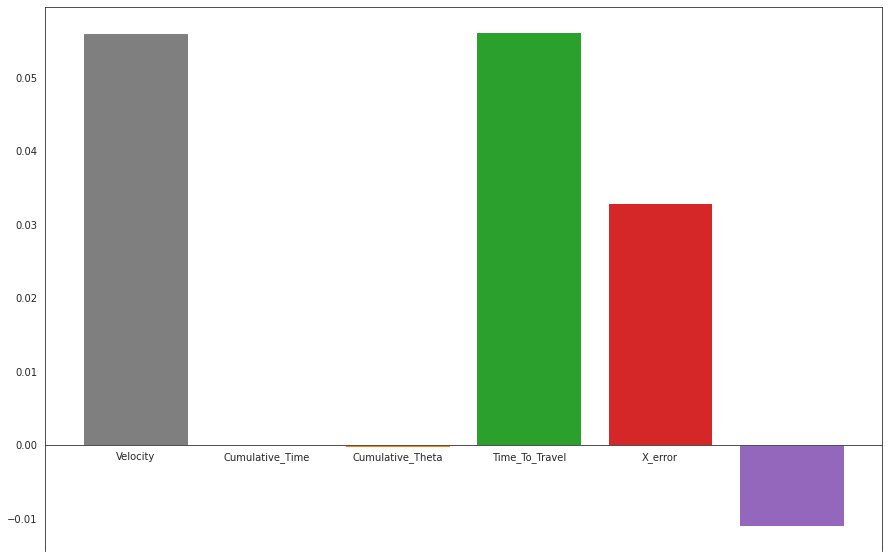

In [14]:
#plotting the coefficient score
fig, ax = plt.subplots(figsize=(15,10))
color =['tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',  
        'tab:pink','tab:gray','tab:olive','tab:cyan','tab:orange','tab:green','tab:blue','tab:olive'] 

ax.bar(lreg_coef["Columns"],  
lreg_coef['Coefficient Estimate'],  
color = color) 
ax.spines['bottom'].set_position('zero') 
ax.axes.xaxis.set_ticklabels(lreg_coef["Columns"])
plt.style.use('ggplot') 
plt.show()

In [15]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

In [16]:
##Calculating the Mean-Squared Error(MSE):
mse1 = np.mean((y_pred1 - y_test)**2)
print("Mean Squared Error: ", mse1)

Mean Squared Error:  0.17640159412005135


In [17]:
"""putting together the coefficient and their corresponding variable names"""
lasso_coef = pd.DataFrame()
lasso_coef['Columns'] = x_train.columns
lasso_coef['Coefficient Estimate'] = pd.Series(lasso.coef_)
print(lasso_coef)

            Columns  Coefficient Estimate
0          Velocity              0.000000
1   Cumulative_Time              0.000050
2  Cumulative_Theta             -0.000148
3    Time_To_Travel              0.000000
4           X_error              0.000000
5           Y_error              0.000000


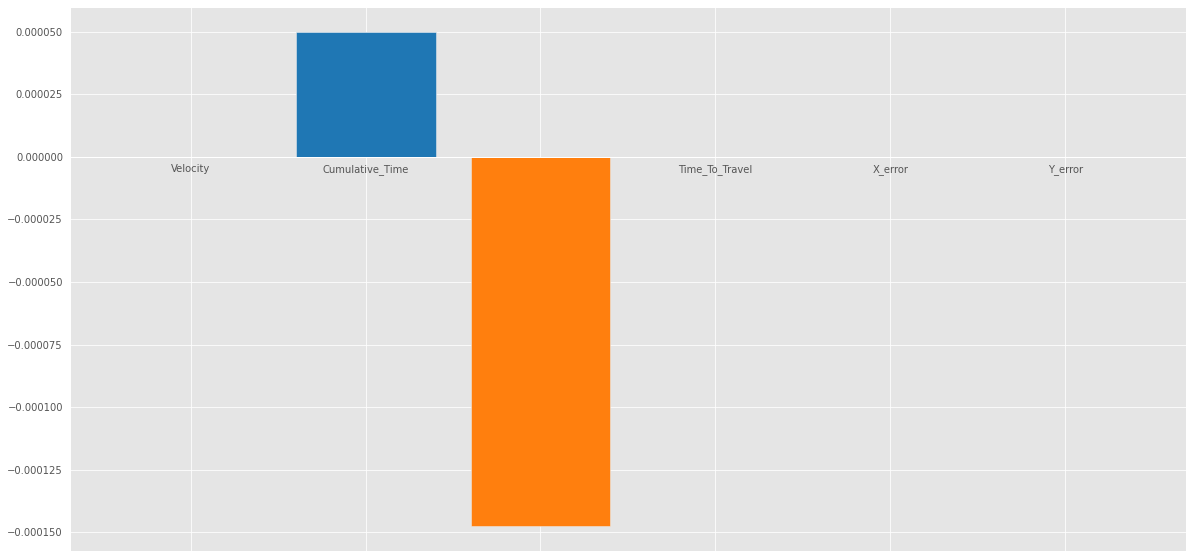

In [18]:
#plotting the coefficient score
fig, ax = plt.subplots(figsize=(20,10))
color =['tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',  
        'tab:pink','tab:gray','tab:olive','tab:cyan','tab:orange','tab:green','tab:blue','tab:olive'] 

ax.bar(lasso_coef["Columns"],  
lasso_coef['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

In [19]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred2 = ridge.predict(x_test)


In [20]:
# Calculating the Mean Squared Error
mse2 = np.mean((y_pred2 - y_test)**2)
print("Mean Square Error:", mse2)


Mean Square Error: 0.15796575226509335


In [21]:
"""putting together the coefficient and their corresponding variable names"""
ridge_coef = pd.DataFrame()
ridge_coef['Columns'] = x_train.columns
ridge_coef['Coefficient Estimate'] = pd.Series(ridge.coef_)
print(ridge_coef)

            Columns  Coefficient Estimate
0          Velocity              0.056010
1   Cumulative_Time             -0.000191
2  Cumulative_Theta             -0.000326
3    Time_To_Travel              0.056224
4           X_error              0.032913
5           Y_error             -0.011026


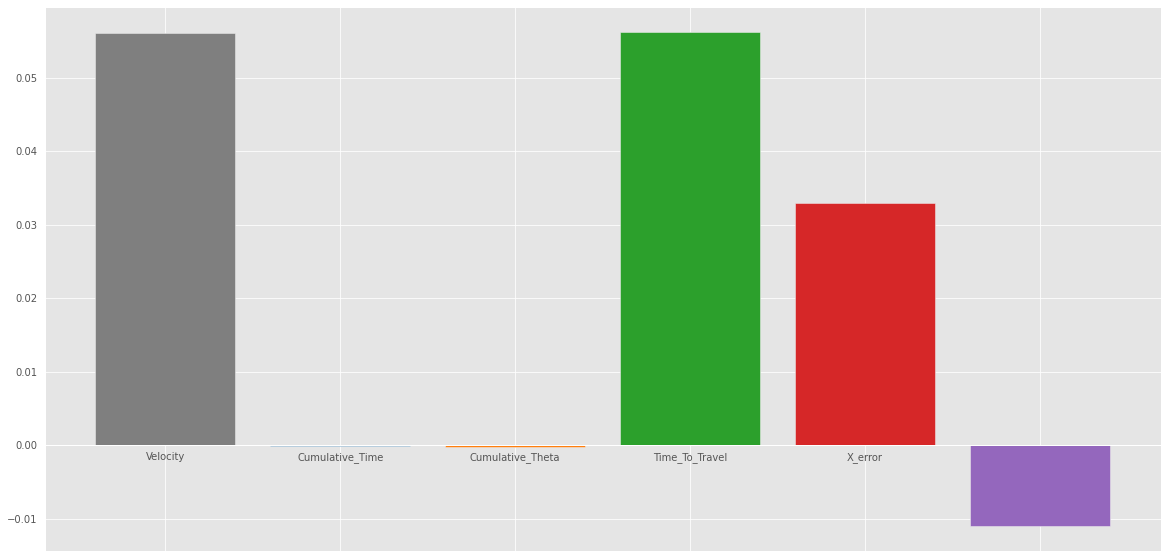

In [22]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize=(20,10))
color =['tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',  
        'tab:pink','tab:gray','tab:olive','tab:cyan','tab:orange','tab:green','tab:blue','tab:olive'] 

ax.bar(ridge_coef["Columns"],  
ridge_coef['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

In [23]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet()
enet.fit(x_test, y_test)
y_pred3 = enet.predict(x_test)

In [24]:
#Calculating0 the Mean Squared Error
mse3 = np.mean((y_pred3 - y_test)**2)
print("Mean Squared Error:", mse3)

Mean Squared Error: 0.17629799086437134


In [25]:
"""putting together the coefficient and their corresponding variable names"""
enet_coef = pd.DataFrame()
enet_coef['Columns'] = x_train.columns
enet_coef['Coefficient Estimate'] = pd.Series(enet.coef_)
print(enet_coef)

            Columns  Coefficient Estimate
0          Velocity              0.000000
1   Cumulative_Time              0.000055
2  Cumulative_Theta             -0.000195
3    Time_To_Travel              0.000000
4           X_error              0.000000
5           Y_error              0.000000


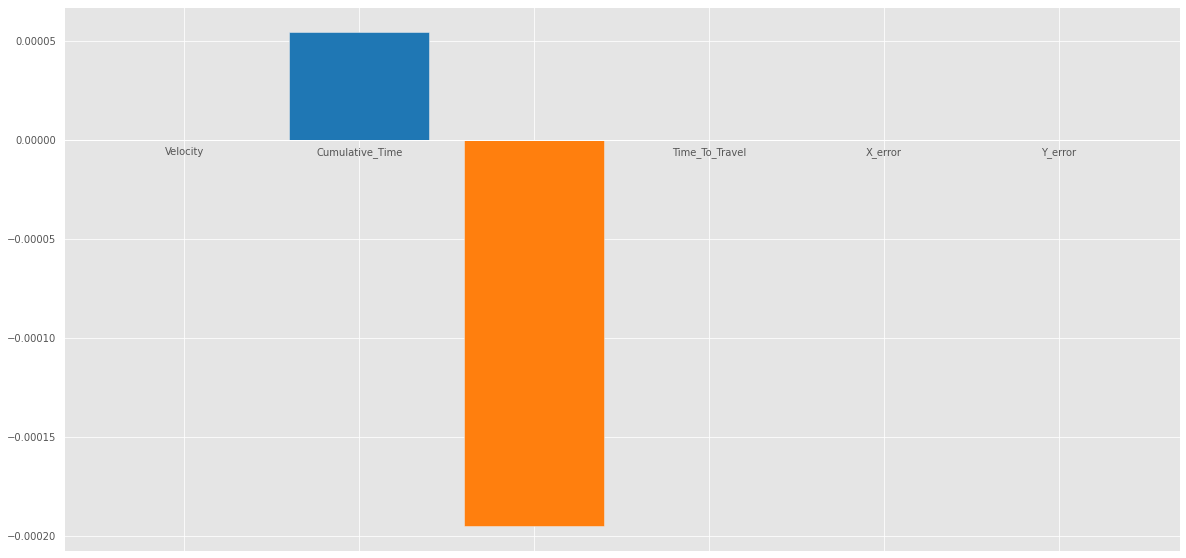

In [26]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize=(20,10))
color =['tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',  
        'tab:pink','tab:gray','tab:olive','tab:cyan','tab:orange','tab:green','tab:blue','tab:olive'] 

ax.bar(enet_coef["Columns"],enet_coef['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 


In [27]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [29]:
#Setting the value for X and Y
x = mobile_robot_data[['Cumulative_Theta']]
y = mobile_robot_data['Distance_travelled_error']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)


In [30]:
slr= LinearRegression()  
slr.fit(x_train, y_train)

#Printing the model coefficients
print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

Intercept:  1.4208392892091353
Coefficient: [0.00622844]


In [31]:
print('Regression Equation: Distance_travelled_error = 1.4208392892091353 + 0.00622844 * Cumulative_Theta')

Regression Equation: Distance_travelled_error = 1.4208392892091353 + 0.00622844 * Cumulative_Theta


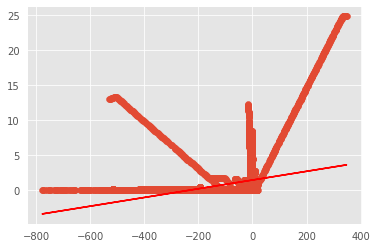

In [32]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 1.4208392892091353 + 0.00622844 * x_train, 'r')
plt.show()

In [33]:
y_pred_slr= slr.predict(x_test)  
x_pred_slr= slr.predict(x_train)

In [34]:
print("Prediction for test set: {}".format(y_pred_slr))
#Actual value and the predicted value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff

Prediction for test set: [1.42083929 0.49324448 1.42083929 ... 1.42083929 1.42083929 1.42083929]


,Actual value,Predicted value
8296,0.040560,1.420839
2671,0.055697,0.493244
4090,0.079448,1.420839
11736,1.326478,0.489440
9769,1.682904,0.759902
...,...,...
8604,0.001823,1.420839
10617,0.028004,1.420839
5966,0.944137,1.420839
9516,0.005450,1.420839


In [35]:
from sklearn.metrics import accuracy_score
print('R squared value of the model: {:.2f}'.format(slr.score(x,y)*100))

R squared value of the model: 5.70


In [36]:

# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1.8246673470848287
Mean Square Error: 10.834197050361515
Root Mean Square Error: 3.29153414844226


In [37]:
x = mobile_robot_data[['Velocity', 'Cumulative_Time']]
y = mobile_robot_data['X_error']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=100)


In [38]:

mlr= LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [39]:
#Printing the model coefficients
print(mlr.intercept_)
# pair the feature names with the coefficients
list(zip(x, mlr.coef_))

0.2192164814579718


[('Velocity', -1.3250919100021554), ('Cumulative_Time', 0.0018754614081709954)]

In [40]:
y_pred_mlr= mlr.predict(x_test)  
x_pred_mlr= mlr.predict(x_train)
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [1.49512442 0.8667407  1.81245407 ... 0.37895982 2.3970742  0.14356897]


In [41]:

#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff

,Actual value,Predicted value
8296,1.137921,1.495124
2671,0.004664,0.866741
4090,2.853963,1.812454
11736,0.157958,-0.118889
9769,0.712996,0.187886
...,...,...
8604,0.653193,0.832711
10617,5.163734,3.964486
5966,1.469517,0.378960
9516,1.246062,2.397074


In [42]:

# print the R-squared value for the model
print('R squared value of the model: {:.2f}'.format(mlr.score(x,y)*100))

R squared value of the model: 51.30


In [43]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1.13296558294372
Mean Square Error: 3.180042641840551
Root Mean Square Error: 1.7832674061510099


In [44]:

# define dataset
X=mobile_robot_data[['Theta'	,'Velocity',	'Cumulative_Time',	'Cumulative_Theta','Surface_Type'	,'X_error','Y_error']]
model=LogisticRegression(random_state=1)
# define the model
features=pd.get_dummies(mobile_robot_data[['Theta'	,'Velocity',	'Cumulative_Time',	'Cumulative_Theta','X_error','Y_error','Surface_Type']])
model = LogisticRegression(random_state=1)
model.fit(features,mobile_robot_data['Label'])
feature_importance=pd.DataFrame({'feature':list(features.columns),'feature_importance':[(i) for i in model.coef_[0]]})
feature_importance.sort_values('feature_importance')
feature_importance


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,feature,feature_importance
0,Theta,-0.505914
1,Velocity,0.339463
2,Cumulative_Time,-0.000096
3,Cumulative_Theta,0.000783
4,X_error,0.529886
5,Y_error,0.612471
6,Surface_Type_CARPET,0.432788
7,Surface_Type_TILE,-0.073481


In [45]:
model=RandomForestClassifier()
 
model.fit(features,mobile_robot_data['Label'])
 
feature_importances=pd.DataFrame({'features':features.columns,'feature_importance':model.feature_importances_})
feature_importances.sort_values('feature_importance')

,features,feature_importance
6,Surface_Type_CARPET,0.011344
7,Surface_Type_TILE,0.013079
0,Theta,0.025937
3,Cumulative_Theta,0.057129
1,Velocity,0.194655
4,X_error,0.218439
2,Cumulative_Time,0.229404
5,Y_error,0.250014


In [46]:
model=smf.logit('Label~Theta+Velocity+Cumulative_Time+Cumulative_Theta+Surface_Type',data=mobile_robot_data)
result = model.fit()
 
feature_importances=pd.DataFrame(result.conf_int()[1]).rename(columns={1:'Coefficients'}).eval("absolute_coefficients=abs(Coefficients)")
feature_importances.sort_values('absolute_coefficients',ascending=False).drop('Intercept')[['absolute_coefficients']]


Optimization terminated successfully.
         Current function value: 0.531569
         Iterations 6


,absolute_coefficients
Surface_Type[T.TILE],0.351040
Velocity,0.231863
Theta,0.183890
Cumulative_Time,0.000417
Cumulative_Theta,0.000186


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [48]:
X=mobile_robot_data[['Theta','Velocity','Cumulative_Time','Cumulative_Theta','X_error','Y_error']]
Y=mobile_robot_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)


In [49]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

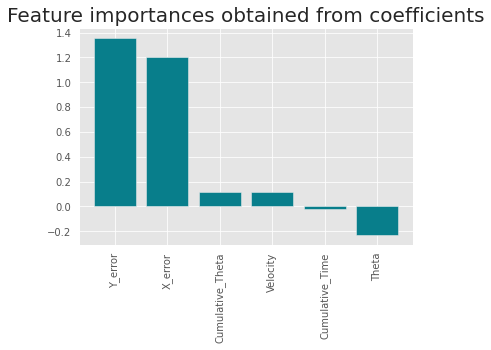

In [50]:

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [51]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

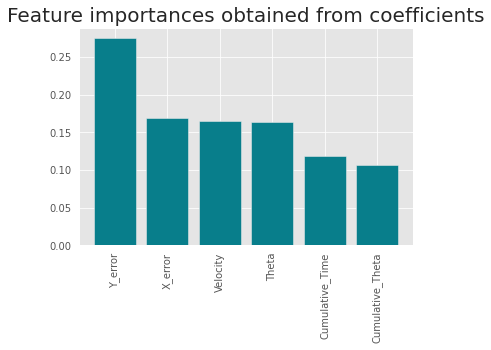

In [52]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [53]:
X=roomba_data[['Theta','Velocity','Cumulative_Time','Cumulative_Theta','X_error','Y_error']]
Y=roomba_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)


In [54]:
import plotly.express as px


features = ['Theta','Velocity','Cumulative_Time','Cumulative_Theta','X_error','Y_error']

fig = px.scatter_matrix(
    mobile_robot_data,
    dimensions=features
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [55]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

features = ['Theta','Velocity','Cumulative_Time','Cumulative_Theta','X_error','Y_error']

X = mobile_robot_data[features]

pca = PCA(n_components=4)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=mobile_robot_data['Label'])

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()



In [56]:
import plotly.express as px
from sklearn.decomposition import PCA


X = mobile_robot_data[features]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=mobile_robot_data['Label'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()


In [57]:
from sklearn.decomposition import PCA

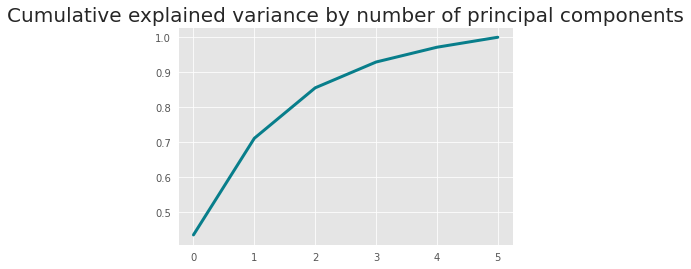

In [58]:
X=mobile_robot_data[['Theta','Velocity','Cumulative_Time','Cumulative_Theta','X_error','Y_error']]
Y=mobile_robot_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

pca = PCA().fit(X_train_scaled)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()


In [59]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)

In [60]:
loadings.head()


,PC1,PC2,PC3,PC4,PC5,PC6
Theta,0.522311,-0.765349,-0.088462,0.061441,0.350458,0.084327
Velocity,-0.435974,0.188910,-0.877834,-0.008752,0.050595,0.033334
Cumulative_Time,0.736163,0.431892,-0.104403,0.487887,0.033003,-0.147005
Cumulative_Theta,0.526954,-0.737558,-0.255240,-0.096044,-0.268843,-0.178267
X_error,0.908002,0.209632,-0.102114,-0.040054,-0.172373,0.299905


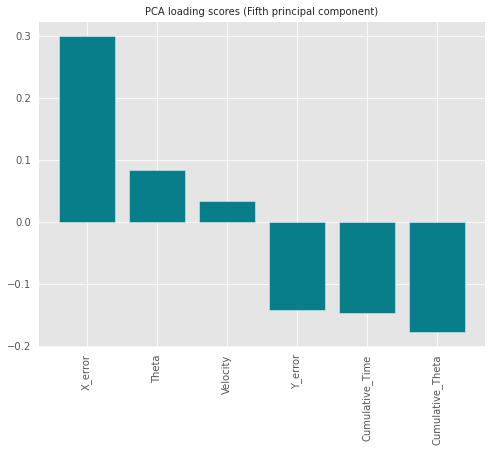

In [61]:
pc1_loadings = loadings.sort_values(by='PC6', ascending=False)[['PC6']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC6']
plt.figure(figsize=(8,6))
plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC6'], color='#087E8B')
plt.title('PCA loading scores (Fifth principal component)', size=10)
plt.xticks(rotation='vertical')
plt.show()


In [62]:
data1=mobile_robot_data.copy(deep=True)
data1=data1.drop(['Distance_travelled_error','X_error','Y_error'],axis=1)
data1

,X_ODOM,Y_ODOM,Theta,Velocity,Odometry_Distance,X_GR,Y_GR,Ground_Truth_Distance,Surface_Type,Time_To_Travel,Cumulative_Time,Cumulative_Theta,Series_ID,timestamp,Label
0,-0.001,-0.001,0.000000e+00,0.25,0.000000,0.011141,-0.001021,0.012151,TILE,0.545720,0.545720,0.000000e+00,0.0,2021-10-27 12:37:24.312,1
1,-0.001,-0.001,0.000000e+00,0.25,0.000000,0.011228,-0.001021,0.012384,TILE,0.596121,1.141841,0.000000e+00,0.0,2021-10-27 12:37:24.510,1
2,-0.001,-0.001,0.000000e+00,0.25,0.000000,0.011441,-0.001022,0.013017,TILE,0.646103,1.787944,0.000000e+00,0.0,2021-10-27 12:37:24.609,1
3,0.001,-0.001,0.000000e+00,0.25,0.002000,0.013168,-0.001025,0.020518,TILE,0.696950,2.484894,0.000000e+00,0.0,2021-10-27 12:37:24.708,1
4,0.007,-0.001,0.000000e+00,0.25,0.008000,0.015079,-0.001028,0.029477,TILE,0.733509,3.218403,0.000000e+00,0.0,2021-10-27 12:37:24.807,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,2.077,-0.007,-2.449294e-16,0.30,2.078009,1.410241,-0.003200,2.113419,CARPET,9.502222,746.610621,-3.477997e-14,61.0,2021-10-30 13:17:26.993,1
13314,2.077,-0.007,-2.449294e-16,0.30,2.078009,1.414512,-0.003207,2.113332,CARPET,9.535574,756.146195,-3.502490e-14,61.0,2021-10-30 13:17:27.092,1
13315,2.077,-0.007,-2.449294e-16,0.30,2.078009,1.420822,-0.003216,2.113390,CARPET,9.585728,765.731923,-3.526983e-14,61.0,2021-10-30 13:17:27.193,1
13316,2.077,-0.007,-2.449294e-16,0.30,2.078009,1.427019,-0.003226,2.113390,CARPET,9.635704,775.367627,-3.551476e-14,61.0,2021-10-30 13:17:27.290,1


In [63]:
array=data1.values
x=array[:,0:5]
y=array[:,5]
y

array([0.011140759764947095, 0.011228246199607671, 0.01144058913015506,
       ..., 1.4208224219725427, 1.4270192956350094, 1.4310897617335054],
      dtype=object)

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [134]:

df = mobile_robot_data[['Velocity','Cumulative_Time','Distance_travelled_error','X_error','Y_error']]
nbrs = NearestNeighbors(n_neighbors = 10)
# fit model
nbrs.fit(df)


NearestNeighbors(n_neighbors=10)

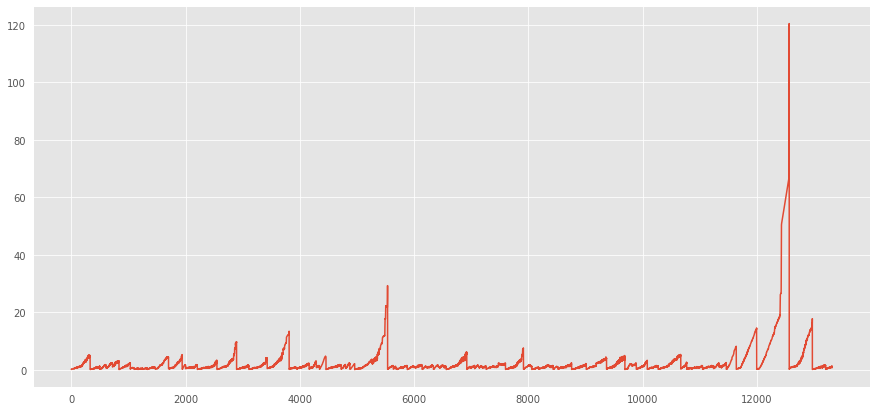

In [135]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(df)
# plot
plt.figure(figsize=(15, 7))
plt.plot(distances.mean(axis =1))

In [136]:
distances = pd.DataFrame(distances)
distances_mean = distances.mean(axis =1)
distances_mean

0        0.122660
1        0.091309
2        0.115122
3        0.113823
4        0.090548
           ...   
13313    0.950098
13314    0.654710
13315    1.227504
13316    0.864472
13317    0.816649
Length: 13318, dtype: float64

In [137]:
distances_mean.describe()

count    13318.000000
mean         2.624281
std          6.623371
min          0.058394
25%          0.619619
50%          1.022299
75%          2.018616
max        120.383845
dtype: float64

In [138]:
th = 9.0
outlier_index = np.where(distances_mean > th)
outlier_index


(array([ 2875,  2877,  2880,  2881,  2882,  2883,  2884,  2885,  2886,
         2887,  2888,  2889,  2890,  2891,  2892,  2893,  3749,  3750,
         3751,  3752,  3753,  3754,  3755,  3756,  3757,  3758,  3759,
         3760,  3761,  3762,  3763,  3764,  3765,  3766,  3767,  3768,
         3769,  3770,  3771,  3772,  3773,  3774,  3775,  3776,  3777,
         3778,  3779,  3780,  3781,  3782,  3783,  3784,  3785,  3786,
         3787,  3788,  3789,  3790,  3791,  3792,  3793,  3794,  3795,
         3796,  3797,  3798,  3799,  3800,  3801,  3802,  3803,  3804,
         3805,  3806,  3807,  3808,  3809,  3810,  3811,  3812,  3813,
         5424,  5426,  5427,  5428,  5429,  5430,  5431,  5432,  5433,
         5434,  5435,  5436,  5437,  5438,  5439,  5440,  5441,  5442,
         5443,  5444,  5445,  5446,  5447,  5448,  5449,  5450,  5451,
         5452,  5453,  5454,  5455,  5456,  5457,  5458,  5459,  5460,
         5461,  5462,  5463,  5464,  5465,  5466,  5467,  5468,  5469,
      

In [140]:
outlier_values = df.iloc[outlier_index]
outlier_values

,Velocity,Cumulative_Time,Distance_travelled_error,X_error,Y_error
2875,0.1,2759.043086,0.073909,0.025451,1.479569
2877,0.1,2792.216969,0.073367,0.024318,1.489765
2880,0.1,2842.361622,0.074063,0.026051,1.502158
2881,0.1,2859.165484,0.073072,0.024397,1.509037
2882,0.1,2876.019439,0.071423,0.024916,1.513356
...,...,...,...,...,...
12966,0.5,3651.453336,12.164841,12.463467,0.364571
12967,0.5,3663.966327,11.921902,12.512948,0.366552
12968,0.5,3676.525408,12.117725,12.558411,0.367497
12969,0.5,3689.107577,12.333996,12.606944,0.369480


Text(0, 0.5, 'Y_error of the robot')

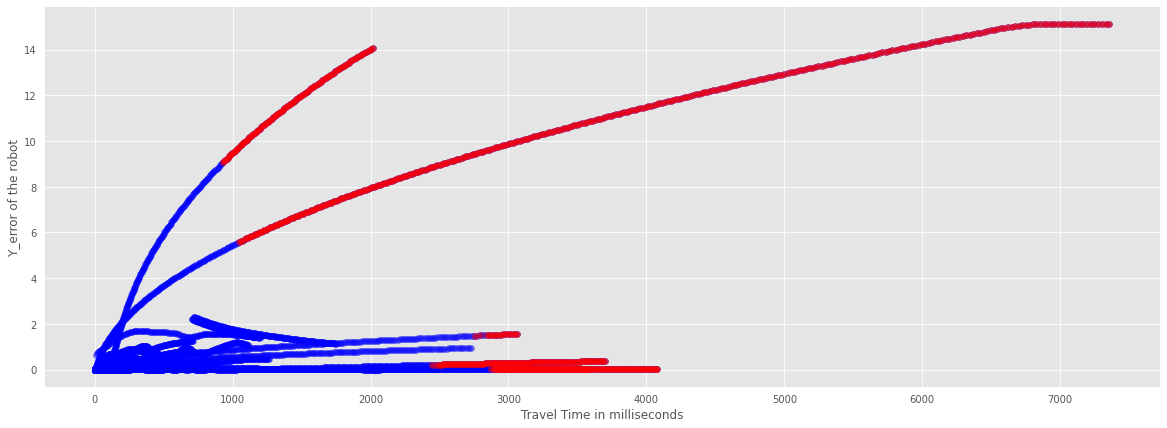

In [146]:
#'X_ODOM','Y_ODOM','X_GR','Y_GR','Theta','Velocity',
plt.figure(figsize=(20, 7))
plt.scatter(df["Cumulative_Time"], df["Y_error"], color = "b",alpha=0.5)
# plot outlier values
plt.scatter(outlier_values["Cumulative_Time"], outlier_values["Y_error"], color = "r",alpha=0.6)
plt.xlabel('Travel Time in milliseconds')
plt.ylabel('Y_error of the robot')

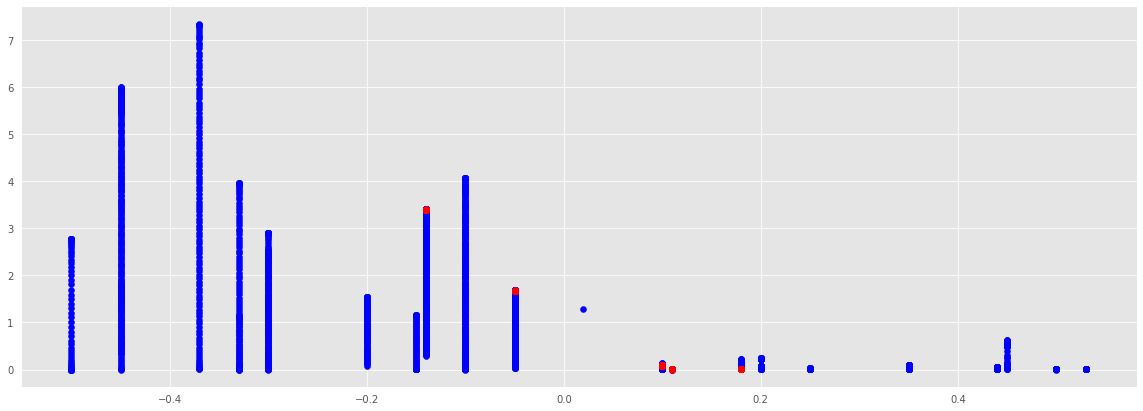

In [103]:
plt.figure(figsize=(20, 7))
plt.scatter(df["Velocity"], df["Distance_travelled_error"], color = "b")
# plot outlier values
plt.scatter(outlier_values["Velocity"], outlier_values["Distance_travelled_error"], color = "r")

Text(0, 0.5, 'Distance_travelled_error')

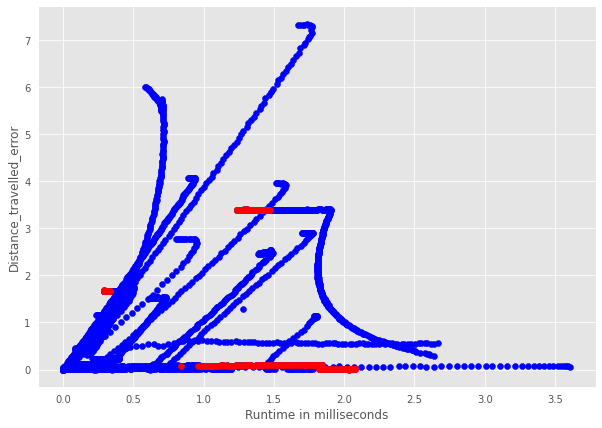

In [104]:
plt.figure(figsize=(10, 7))
plt.scatter(df["X_error"], df["Distance_travelled_error"], color = "b")
# plot outlier values
plt.scatter(outlier_values["X_error"], outlier_values["Distance_travelled_error"], color = "r")
plt.xlabel("Runtime in milliseconds")
plt.ylabel("Distance_travelled_error")

In [74]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X=mobile_robot_data[['Theta']]
Y=mobile_robot_data[['Distance_travelled_error']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [75]:
slr= LinearRegression()  
slr.fit(x_train, y_train)

LinearRegression()

In [76]:

#Printing the model coefficients
print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

Intercept:  [1.37390088]
Coefficient: [[0.86386134]]


In [77]:
slr.intercept_[0]
slr.coef_[0][0]
print('Regression Equation: Sales = '+str(slr.intercept_[0])+'+'+  str(slr.coef_[0][0]) +'* Theta')

Regression Equation: Sales = 1.3739008824165366+0.8638613388306439* Theta


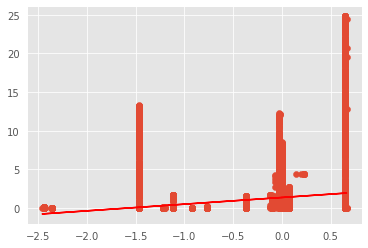

In [78]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 1.3739008824165366 + 0.86386133*x_train, 'r')
plt.show()

In [79]:
#Prediction of Test and Training set result  
y_pred_slr= slr.predict(x_test)  
x_pred_slr= slr.predict(x_train)

In [80]:
print("Prediction for test set: {}".format(y_pred_slr))


Prediction for test set: [[1.37390088]
 [0.31849516]
 [1.37390088]
 ...
 [1.37390088]
 [1.37390088]
 [1.37390088]]


In [81]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [82]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  [1.37390088]
Coefficients:


[(array([-0.001, -0.001, 0.0, 0.25, 0.0], dtype=object), array([0.86386134]))]

In [83]:
y_pred_mlr= mlr.predict(x_test)
print("Prediction for test set: {}".format(y_pred_mlr))
 

Prediction for test set: [[1.37390088]
 [0.31849516]
 [1.37390088]
 ...
 [1.37390088]
 [1.37390088]
 [1.37390088]]
